In [2]:
packageVersion("ellipsis")

[1] ‘0.3.1’

In [4]:
.libPaths()

[1] "/home/jpm73279/.conda/envs/r_env/lib/R/library"

In [1]:
library("here")
library(devtools)
library(Seurat)
library(harmony)
library(RcppML)
library(reshape2)
library(tidyverse)
load_all('/home/jpm73279/Socrates')
data_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output/"

set.seed(12345)



here() starts at /home/jpm73279/Mendieta_et_al_comparative_single_cell

Warning message:
“package ‘devtools’ was built under R version 4.1.3”
Loading required package: usethis

Warning message:
“package ‘usethis’ was built under R version 4.1.3”


ERROR: Error: package or namespace load failed for ‘devtools’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace ‘ellipsis’ 0.3.1 is already loaded, but >= 0.3.2 is required


In [2]:

library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

In [3]:
# bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/"

sb_leaf_rep_1 <- paste0(analysis_path, "Sorghum_leaf.sciATAC.merged.unique.tn5.sorted.bed")

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"Sbicolorv5.1.primaryTrs.gff3")
chr <- paste0(reference_genome_path,"Sorghum_bicolor_var_BTx623.chrom.size")
pre <- "Sb.Leaf_merged_reps"



#Load Object
Sb.subcluster <- loadBEDandGenomeData(sb_leaf_rep_1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/Sorghum_leaf.sciATAC.merged.unique.tn5.sorted.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sbicolorv5.1.primaryTrs.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sorghum_bicolor_var_BTx623.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take obj while for big BED files) ...

 - finished loading data



In [3]:

marker_list_sb_file <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/markers/Sb.leaf_markers_from_zm.markers.txt"
marker_list_sb <- read_delim(marker_list_sb_file, delim='\t', 
                                       col_names = TRUE)

Rows: 151 Columns: 7
── Column specification ───────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): chr, geneID, name, type, tissue
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
loaded_socrates_data <- readRDS("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb_leaf.peak_clustering.SVD.full.rds")

In [6]:
str(loaded_socrates_data)

List of 12
 $ counts     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:20303533] 3 5 7 9 11 15 20 21 22 24 ...
  .. ..@ p       : int [1:14727] 0 24425 33939 53369 63867 81261 96748 112159 126429 141634 ...
  .. ..@ Dim     : int [1:2] 50116 14726
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:50116] "Chr01_100020_100521" "Chr01_10004430_10004931" "Chr01_10010580_10011081" "Chr01_10011231_10011732" ...
  .. .. ..$ : chr [1:14726] "BC:Z:GCCAATATGTCACTAAGGGTAGCACTA-Sorghum_leaf.sciATAC_rep1" "BC:Z:CGATGTAGTCAACTAAGATTCCTACCG-Sorghum_leaf.sciATAC_rep1" "BC:Z:TTAGGCAGTCAAAAACACGTACGTCGG-Sorghum_leaf.sciATAC_rep1" "BC:Z:ACAGTGCCGTCCCTAAGGTAGAGAGCT-Sorghum_leaf.sciATAC_rep1" ...
  .. ..@ x       : num [1:20303533] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ meta       :'data.frame':	14726 obs. of  14 variables:
  ..$ cellID              : chr [1:14726] "BC:Z:GCCAATATGTCACTAAGGGTAGCACTA-Sorghum_leaf.sciATAC_rep1" "BC:Z:CGATGTAGTCAACTAAGATTCCTAC

In [7]:

sb.loaded_socrates_data.epidermal <- loaded_socrates_data
cleaned_cluster_meta <- sb.loaded_socrates_data.epidermal$sub_cluster  %>% 
        group_by(LouvainClusters)  %>% 
        mutate(Louvain_cluster_safe = str_c("LouvainC_", LouvainClusters))
    
sb.loaded_socrates_data.epidermal$Clusters <- cleaned_cluster_meta

## SubClustering Epidermal Lineages:
"LouvainC_2", "LouvainC_12", "LouvainC_20", 
"LouvainC_4", "LouvainC_6", "LouvainC_18",
"LouvainC_15", "LouvainC_1"

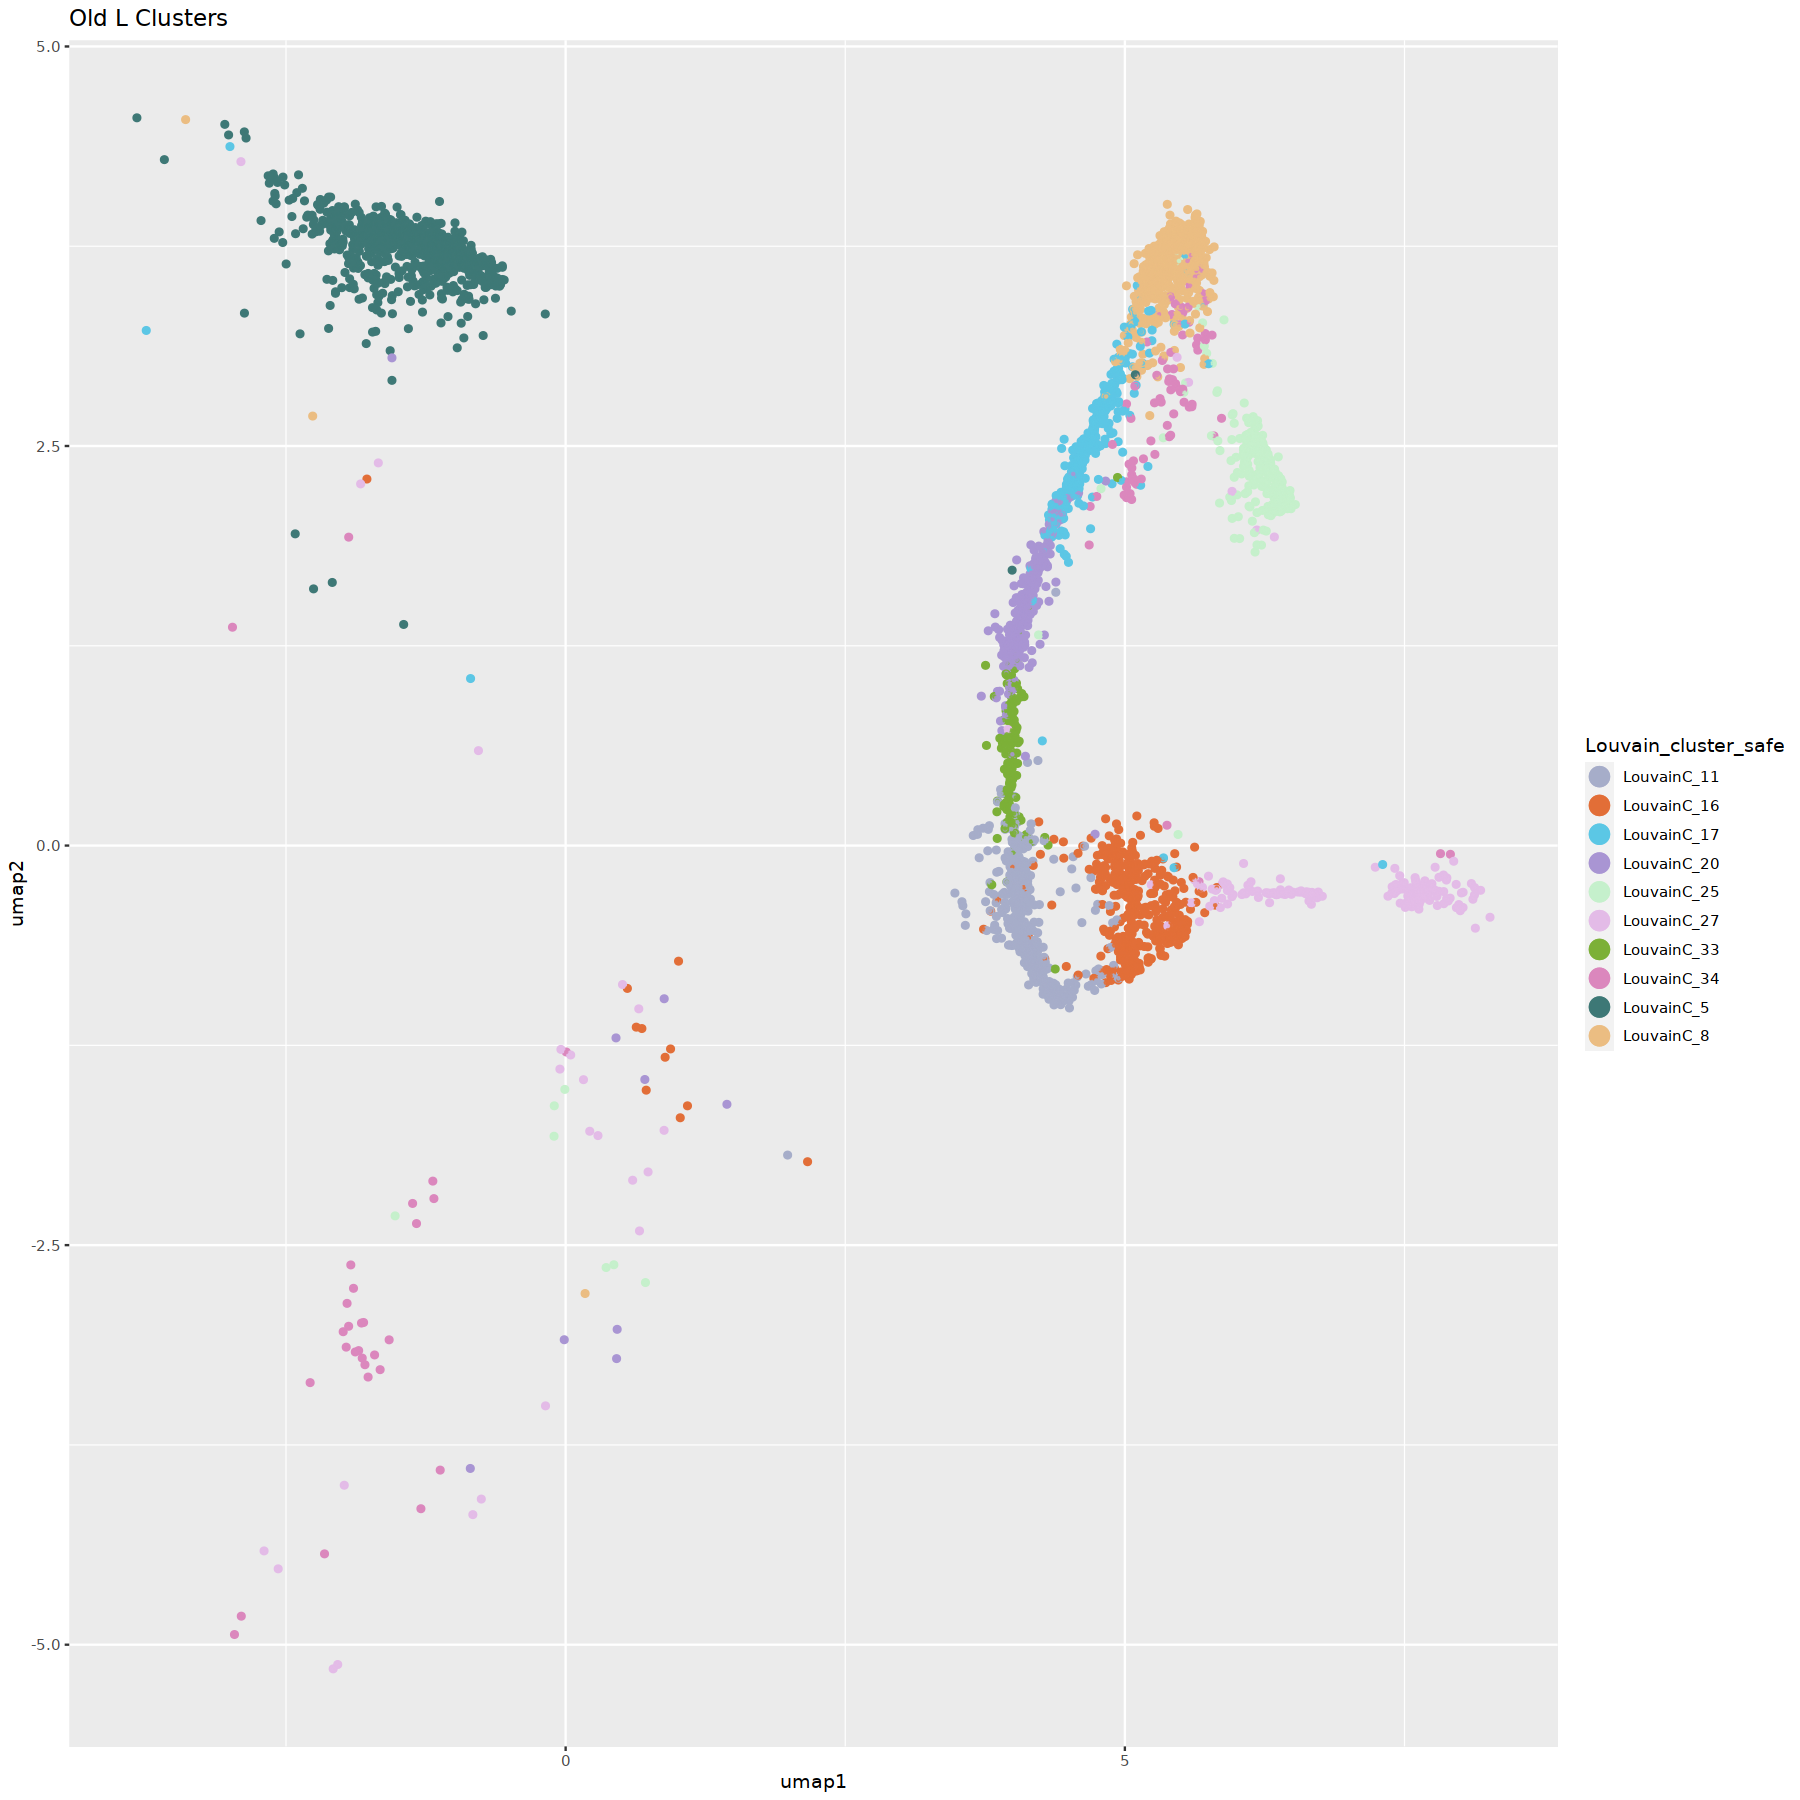

In [126]:
library(cowplot)
library(randomcoloR)
options(repr.plot.width=15, repr.plot.height=15)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)


Sb.subcluster.epidermal <- Sb.subcluster

clusters <- c("LouvainC_5","LouvainC_11","LouvainC_16","LouvainC_27","LouvainC_33",
             "LouvainC_20","LouvainC_25","LouvainC_8","LouvainC_34","LouvainC_17")


#clusters <- c("LouvainC_5")
#c("LouvainC_18","LouvainC_5","LouvainC_7","LouvainC_32",
#  "LouvainC_24","LouvainC_21","LouvainC_8","LouvainC_20","LouvainC_23")

sb.loaded_socrates_data.epidermal$Clusters  %>% 
    filter(Louvain_cluster_safe %in% clusters) %>% 
    group_by(Louvain_cluster_safe) %>% 
    ggplot(., aes(umap1, umap2, color = Louvain_cluster_safe)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Old L Clusters")

chosen_subcluster <- sb.loaded_socrates_data.epidermal$Clusters %>% 
    filter(Louvain_cluster_safe %in% clusters)

meta_df <- as.data.frame(chosen_subcluster)
rownames(meta_df) <- meta_df$cellID
Sb.subcluster.epidermal$meta <- meta_df
Sb.subcluster.epidermal$meta.v3 <- meta_df
Sb.subcluster.epidermal$acr <- read.table("/scratch/jpm73279/comparative_single_cell/07.call.ACRs/Sb_peak_calls/Sb.peaks/Sb.peaks.500bp_peaks.bed")

In [123]:
??generateMatrix

In [127]:
Sb.subcluster.epidermal <- generateMatrix(Sb.subcluster.epidermal, 
                                              filtered=FALSE,
                                              windows = 200,
                                              verbose=TRUE)

In [128]:
Sb.subcluster.epidermal <- convertSparseData(Sb.subcluster.epidermal, verbose = TRUE)

 - converting triplet format to sparseMatrix



In [129]:
# clean sparse counts matrix ---------------------------------------------
Sb.subcluster.epidermal.clean <- cleanData(Sb.subcluster.epidermal, 
                     min.t=0.01,  # minimum feature frequency across cells
                     max.t=0.15, # maximum feature frequency across cells
                     min.c = 200,
                     verbose=T)


   * Input: cells = 3731 | peaks = 3117669

   * Filtered: cells = 3634 | peaks = 79805



In [66]:
Sb.subcluster.epidermal.clean$meta  %>% 
    group_by(Louvain_cluster_safe)  %>% 
    summarise(n())
    

Louvain_cluster_safe,n()
<chr>,<int>
LouvainC_11,434
LouvainC_16,372
LouvainC_17,338
LouvainC_20,308
LouvainC_25,260
LouvainC_27,171
LouvainC_33,131
LouvainC_34,92
LouvainC_5,653


In [131]:
# normalize with TFIDF ---------------------------------------------------
Sb.subcluster.epidermal.tfidf <- tfidf(Sb.subcluster.epidermal.clean,
                                                        doL2=TRUE)

In [132]:
# project with NMF -------------------------------------------------------
Sb.subcluster.epidermal.tfidf <- reduceDims(Sb.subcluster.epidermal.tfidf,
                      method="SVD", 
                      n.pcs=150, 
                      num.var=5000,
                      svd_slotName="SVD")

 - non-linear dimensionality reduction with UMAP ...

14:32:37 UMAP embedding parameters a = 1.577 b = 0.8951

14:32:37 Read 3634 rows and found 150 numeric columns

14:32:37 Using Annoy for neighbor search, n_neighbors = 15

14:32:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:32:38 Writing NN index file to temp file /tmp/RtmpB19zd6/file911f16eb25fb

14:32:38 Searching Annoy index using 16 threads, search_k = 1500

14:32:38 Annoy recall = 100%

14:32:41 Commencing smooth kNN distance calibration using 16 threads
 with target n_neighbors = 15

14:32:45 Initializing from normalized Laplacian + noise (using irlba)

14:32:45 Commencing optimization for 500 epochs, with 95802 positive edges

14:33:01 Optimization finished



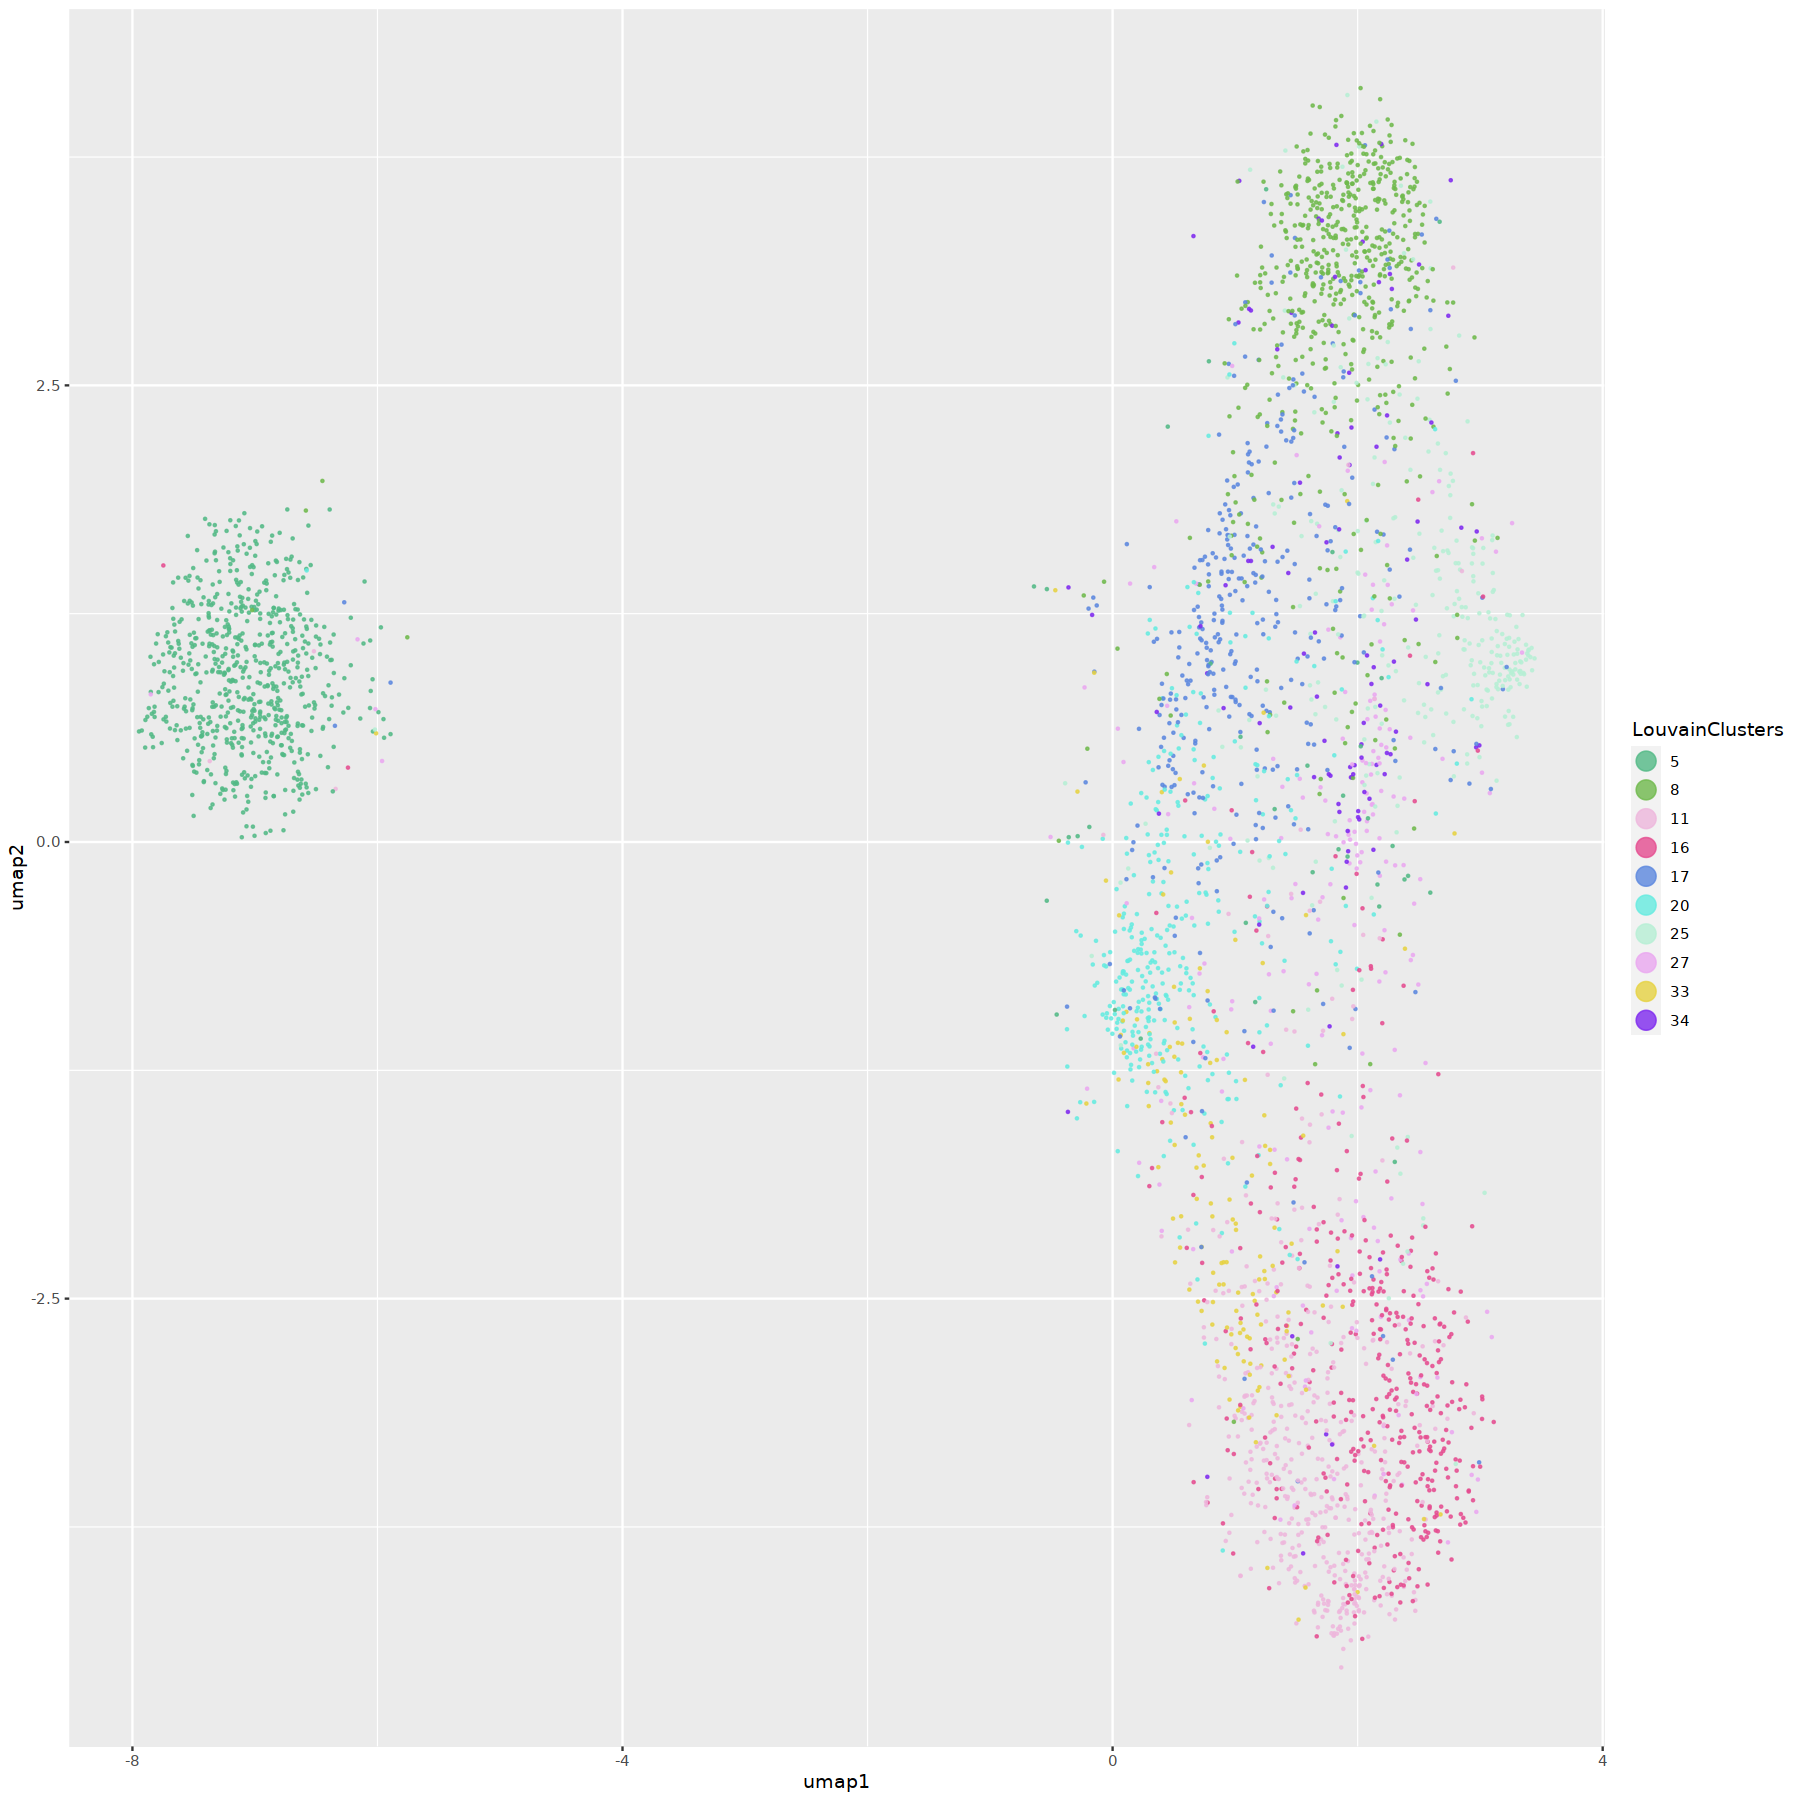

In [133]:
# reduce to 2-dimensions with UMAP ---------------------------------------
Sb.subcluster.epidermal.tfidf <- projectUMAP(Sb.subcluster.epidermal.tfidf, 
                       verbose=T,
                       k.near=15,
                       m.dist=0.1,
                       svd_slotName="SVD")

library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

ggplot(Sb.subcluster.epidermal.tfidf$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)

In [134]:
# identify clusters using neighborhood graph -----------------------------
Sb.subcluster.epidermal.tfidf.clusters <- callClusters(Sb.subcluster.epidermal.tfidf, 
                        res=2.0,
                        k.near = 8,
                        min.reads=1,
                        verbose=T,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster",
                        cleanCluster=FALSE)


 - filtering outliers in UMAP manifold (z-score e.thresh = 3) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3578
Number of edges: 389243

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.5145
Number of communities: 9
Elapsed time: 6 seconds


 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



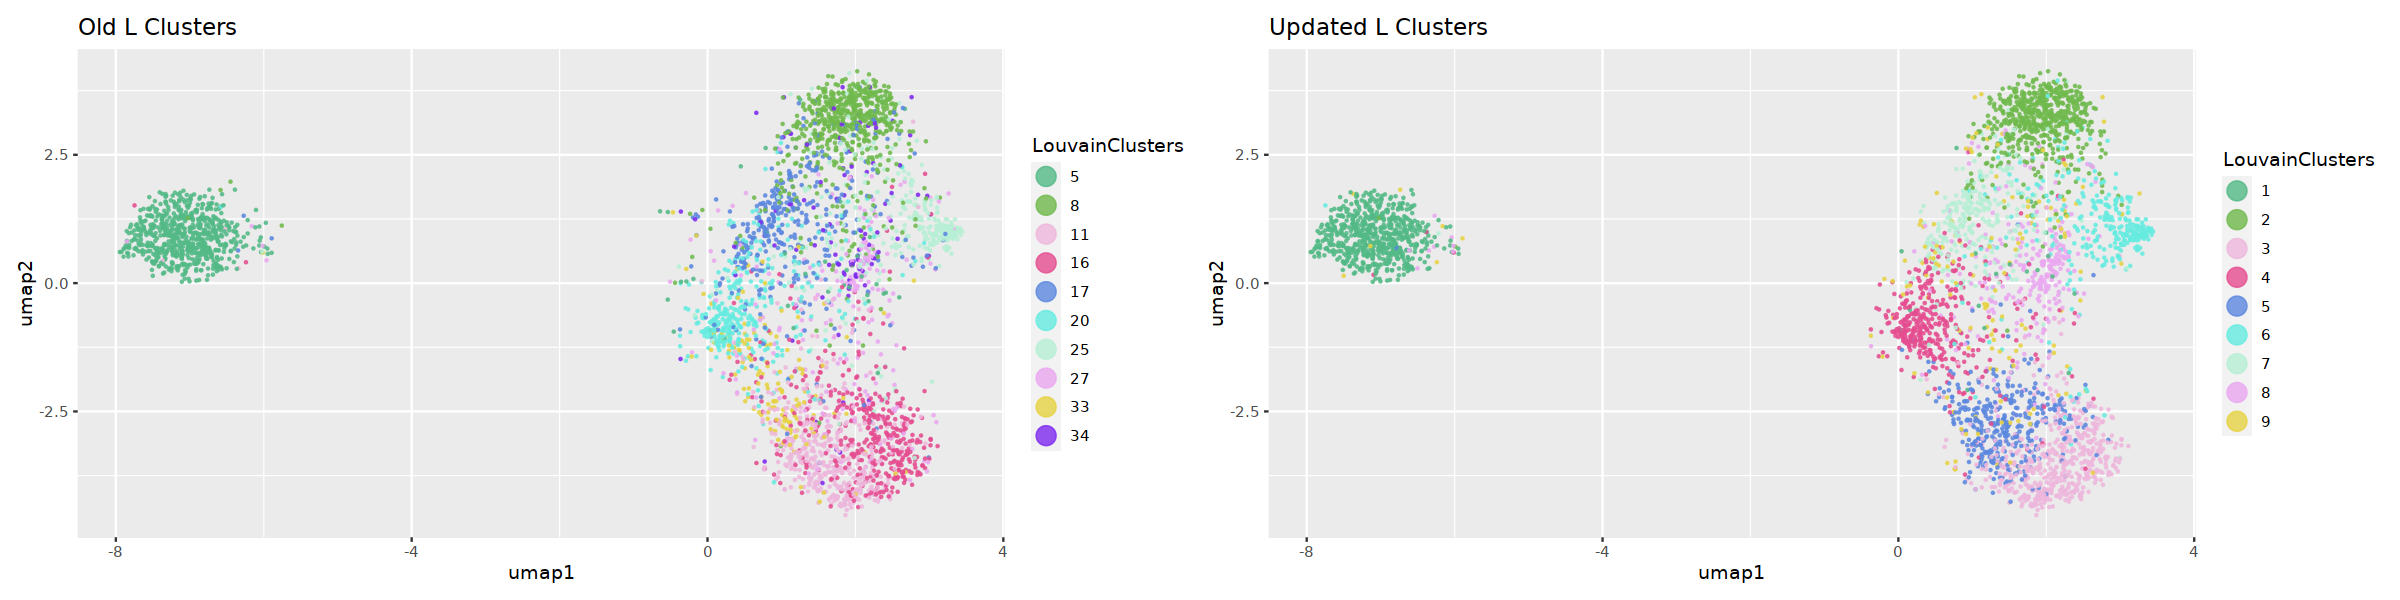

In [135]:
options(repr.plot.width=20, repr.plot.height=5)

old_clusters <- ggplot(Sb.subcluster.epidermal.tfidf.clusters$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

new_clusters <- ggplot(Sb.subcluster.epidermal.tfidf.clusters$sub_cluster, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")


old_clusters + new_clusters 

In [72]:
Sb.subcluster.epidermal.tfidf.clusters$sub_cluster  %>% 
    group_by(LouvainClusters)  %>% 
    summarise(n())

LouvainClusters,n()
<fct>,<int>
1,644
2,489
3,459
4,426
5,320
6,298
7,238
8,195
9,182


In [136]:
library("presto")
run_presto <- function(meta_obj, 
                       meta_slot = "Clusters", 
                       cluster_name = "LouvainClusters", 
                       counts_raw="acr_counts_raw"){
    ### Pull the correct meta datafrom the Socrates Object
    sparse_matrix <- meta_obj[[counts_raw]]
    meta_data <- meta_obj[[meta_slot]]
    
    print(head(as_tibble(meta_data)))
        
    ### Read the Giant Sparse Matrix
    loaded_sparse_matric <- read_delim(sparse_matrix, delim='\t', 
                                       col_names = c("gene_name", "barcode", "accessability"), 
                                       col_types = "ccn")
    
    print(head(loaded_sparse_matric))
    combined_large_w_sparse <- loaded_sparse_matric  %>% 
        filter(gene_name != "Annotation")  %>% 
        dplyr::select(gene_name, barcode, accessability)  %>% 
        left_join(., meta_data, by = c("barcode" = "cellID"))  %>% 
        filter(is.na(!!sym(cluster_name)) != TRUE)  %>% 
        arrange(!!sym(cluster_name))
    
    #order <- combined_large_w_sparse[!!sym(cluster_name)]

    combined_large_w_sparse <- combined_large_w_sparse  %>% 
        dplyr::select(gene_name, barcode, accessability)  %>% 
        mutate(across(accessability, as.numeric))
    
    
    gene_names <- unique(combined_large_w_sparse$gene_name)
    barcodes <- unique(combined_large_w_sparse$barcode)

    combined_large_w_sparse$row <- match(combined_large_w_sparse$gene_name, gene_names)
    combined_large_w_sparse$col <- match(combined_large_w_sparse$barcode, barcodes)


    UIMatrix <- sparseMatrix(i = combined_large_w_sparse$row,
                         j = combined_large_w_sparse$col,
                         x = combined_large_w_sparse$accessability,
                         dimnames=list(gene_names, barcodes))

    print(head(tibble(barcode = unlist(UIMatrix@Dimnames[2]))))
    barcode_tibble <- tibble(barcode = unlist(UIMatrix@Dimnames[2])) %>% 
        left_join(., as_tibble(meta_data), by = c("barcode" = "cellID"))  %>% 
        filter(is.na(total) != TRUE)
    
    print(dim(barcode_tibble))
    print(dim(UIMatrix))
    
    clust_name <- c(cluster_name)
    garbbed_louv_order <- pull(barcode_tibble,!!sym(clust_name))

    sparse_matrix_test <- wilcoxauc(UIMatrix, garbbed_louv_order)
    
    meta_obj[["presto_marker"]] <- sparse_matrix_test
    
    return(meta_obj)
}


In [137]:
setwd("/scratch/jpm73279/comparative_single_cell/dev_location")
Sb.subcluster.epidermal.tfidf.clusters$all_genes <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sbicolorv5.1.gene.bed"
#bed_intersections <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm.all_mergeed_repds.unique.mpq10.tn5.sorted.bed"
genome_file <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sorghum_bicolor_var_BTx623.mainGenome.MtPt.fasta.fai"

In [138]:
### Kernal Corrupted to just linked to the previosly run gene body accessability calculations
tfidf.obj.dob.filt.clusters.counts <- Sb.subcluster.epidermal.tfidf.clusters
tfidf.obj.dob.filt.clusters.counts$acr_counts_raw <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.gene_counts.output"

In [139]:
## Execute Annotation Attempt #1

library(presto)
Sb.subcluster.tfidf.clusters.final <- run_presto(tfidf.obj.dob.filt.clusters.counts,
           meta_slot = "sub_cluster",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

# A tibble: 6 × 14
  cellID    total   tss  acrs  ptmt nSites log10…¹ sampl…²  umap1  umap2 doubl…³
  <chr>     <dbl> <dbl> <dbl> <dbl>  <dbl>   <dbl> <chr>    <dbl>  <dbl>   <dbl>
1 BC:Z:CG… 159908 50092 29336     0 106705    5.03 rep1     2.58  -2.39    0.612
2 BC:Z:AC…  99224 62412 83029     0  47980    4.68 rep1     1.97  -0.455   0.659
3 BC:Z:GC…  83441 49165 67016     0  44818    4.65 rep1     2.14   0.739   0.412
4 BC:Z:TG…  58556 34781 42497     0  34611    4.54 rep1     1.62   2.48    0.424
5 BC:Z:AC…  55513 24058 23649     0  37377    4.57 rep1    -6.95   0.930   0.671
6 BC:Z:AT…  55460 32640 43116     0  32863    4.52 rep1     0.995  1.56    0.329
# … with 3 more variables: d.type <chr>, LouvainClusters <fct>,
#   Louvain_cluster_safe <chr>, and abbreviated variable names ¹​log10nSites,
#   ²​sampleID, ³​doubletscore
# A tibble: 6 × 3
  gene_name        barcode                                               acces…¹
  <chr>            <chr>                                     

In [140]:
grabbed_top_marker_per_cluster <- top_markers(Sb.subcluster.tfidf.clusters.final$presto_marker, 200)


In [141]:
represented_marker_lst <- list()
for (i in unique(Sb.subcluster.tfidf.clusters.final$sub_cluster$LouvainClusters)) {
    
    make_set <- setNames("geneID",i) 
    markers_present_in_presto <- left_join(grabbed_top_marker_per_cluster, 
                                           marker_list_sb, by = make_set)  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, i, chr:tissue) %>% 
    dplyr::rename("geneID" = i)
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

rank,geneID,chr,start,end,name,type,tissue
<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
89,Sobic.002G032500,Chr02,3002965,3011531,pan2,"subsidiary_mother_cell,developing_pavement_cell,cortex",axillaryBud;leaf;crownRoot;root
91,Sobic.008G112200,Chr08,54920473,54923616,myb46,xylem,axillaryBud;leaf;crownRoot;root;tassel;ear
166,Sobic.007G211200,Chr07,67406141,67408727,pan1,subsidary_mother_cell,axillaryBud;leaf
rank,geneID,chr,start,end,name,type,tissue
<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Sobic.002G207900,Chr02,61233338,61239219,gl1,epidermis,axillaryBud;leaf;crownRoot;root
121,Sorbiv5.1_pg14938.valid.m7.g,Chr03,8560607,8567782,ocl1,"protoderm,L1_SAM,L1_leaf_primordia,L1_proximal_meristem,atrichoblast,L1_inflorescence_meristem,L1_spikelet_pair_meristem,L1_spikelet_meristem,L1_upper_floral_meristem,L1_lower_floral_meristem,L1_stamen_primordia,L1_palea_primordia,L1_lemma_primordia,L1_glume_primordia,L1_branch_meristem,L1_pistil_primordia",axillaryBud;leaf;crownRoot;root;tassel;ear
154,Sobic.001G537300,Chr01,84195608,84203525,rld1,"SAM,leaf_primordia,provascular_strands,protoxylem",axillaryBud;leaf
rank,geneID,chr,start,end,name,type,tissue


In [79]:
gathered_markers <- bind_rows(represented_marker_lst, .id = "LouvainCluster")  %>% 
    arrange(LouvainCluster, rank)


write_delim(gathered_markers, 
            "/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/V3_annotations/Sb_leaf.merged_replicates.Subclustering_vaculature.peaks.presto.txt", 
            col_names = TRUE, quote = "none", delim = "\t")

gathered_markers

LouvainCluster,rank,geneID,chr,start,end,name,type,tissue
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,1,Sobic.010G160700,Chr10,48834723,48842334,pepc1,mesophyll,axillaryBud;leaf
1,2,Sorbiv5.1_pg15362.valid.m24.g,Chr03,63610236,63623676,cah1,mesophyll,axillaryBud;leaf
1,108,Sobic.002G207900,Chr02,61233338,61239219,gl1,epidermis,axillaryBud;leaf;crownRoot;root
1,173,Sobic.005G042000,Chr05,3935393,3936843,ssu2__ssu1,bundle_sheath,axillaryBud;leaf
2,120,Sobic.005G042000,Chr05,3935393,3936843,ssu2__ssu1,bundle_sheath,axillaryBud;leaf
2,169,Sorbiv5.1_pg15531.m1.g,Chr03,3341071,3347117,me3_ortho_count_1,bundle_sheath,axillaryBud;leaf
2,193,Sobic.008G094000,Chr08,46768135,46771205,sweet13a_ortho_count_1__sweet13b_ortho_count_1__sweet13c_ortho_count_1,abaxial_bundle_sheath.phloem_parenchyma,leaf
3,8,Sorbiv5.1_pg9159.m1.g,Chr06,41574374,41588764,ba2,"axillary_meristem,branch_meristem,peripheral_zone_inflorescence_meristem,spikelet_pair_meristem,spikelet_meristem,upper_floral_meristem,lower_floral_meristem,pistil_primordia,stamen_primordia,provascular_strands,glume_primordia,lemma_primordia,palea_primordia",axillaryBud;leaf;tassel;ear
3,34,Sobic.007G141200,Chr07,60395810,60403219,ccr1,vascular_sclerenchyma,axillaryBud;leaf;crownRoot;root;tassel;ear


In [80]:
represented_marker_lst

rank,geneID,chr,start,end,name,type,tissue
<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
29,Sobic.002G032500,Chr02,3002965,3011531,pan2,"subsidiary_mother_cell,developing_pavement_cell,cortex",axillaryBud;leaf;crownRoot;root
135,Sobic.001G145200,Chr01,11750927,11755977,cvp2,"phloem_sieve_element_precursors,protophloem_sieve_element",axillaryBud;leaf;crownRoot;root;tassel;ear
162,Sobic.001G221900,Chr01,21229983,21235639,ad1,"protoderm,L1_SAM,L1_leaf_primordia,L1_inflorescence_meristem,L1_spikelet_pair_meristem,L1_spikelet_meristem,L1_upper_floral_meristem,L1_lower_floral_meristem,L1_pistil_primordia,L1_stamen_primordia,L1_palea_primordia,L1_lemma_primordia,L1_glume_primordia,L1_branch_meristem",axillaryBud;leaf;tassel;ear
199,Sorbiv5.1_pg7389.valid.m23.g,Chr06,60678690,60686342,ZmMP_1__ZmMP_2,procambial_meristem,axillaryBud;leaf;crownRoot;root;tassel;ear
rank,geneID,chr,start,end,name,type,tissue
<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Sobic.002G207900,Chr02,61233338,61239219,gl1,epidermis,axillaryBud;leaf;crownRoot;root
100,Sobic.001G537300,Chr01,84195608,84203525,rld1,"SAM,leaf_primordia,provascular_strands,protoxylem",axillaryBud;leaf
136,Sobic.002G343500,Chr02,72301461,72308725,ZmCPK37__ZmCPK35,guard_cell,axillaryBud;leaf


In [166]:
head(Sb.subcluster.tfidf.clusters.final$presto)

,feature,group,avgExpr,logFC,statistic,auc,pval,padj,pct_in,pct_out
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Sobic.001G125600,1,0.01335312,0.001989479,978404.0,0.4998753,0.9406657711,0.96940556,0.5934718,0.6198347
2,ta.jpa7.902.25679f3.g,1,0.30118694,-0.022848869,972423.5,0.4968198,0.6623704289,0.79649154,12.9080119,13.4297521
3,ta.jpa7.902.25695f2.g,1,0.51928783,-0.060946326,961312.0,0.4911429,0.3042212423,0.52005783,18.6943620,20.4889807
4,Sobic.001G125900,1,0.44955490,0.144802830,1023906.0,0.5231227,0.0013503688,0.01050183,16.6172107,12.2245179
5,Sobic.001G126000,1,0.47032641,0.153522002,1030781.5,0.5266355,0.0003130923,0.00310213,17.9525223,12.8443526
6,Sobic.001G126100,1,0.21810089,-0.059102967,955246.0,0.4880437,0.0791078412,0.22886665,9.4955490,11.8801653


In [163]:
Sb.grup_2_top_100 <- Sb.subcluster.tfidf.clusters.final$presto  %>% 
    dplyr::filter(group == "2")  %>% 
    top_n(100)  %>% 
    dplyr::select(feature,pval)

Selecting by pct_out


In [164]:
deframed_vals <- deframe(Sb.grup_2_top_100)

In [165]:
deframed_vals

Sorbiv5.1_pg1615.valid.m1.g  Sorbiv5.1_pg4817.valid.m11.g 
                 4.492854e-02                  1.073119e-11 
 Sorbiv5.1_pg1771.valid.m43.g   Sorbiv5.1_pg1352.valid.m8.g 
                 2.793428e-06                  2.144272e-01 
             Sobic.001G074400              Sobic.001G079401 
                 2.819279e-02                  1.610422e-01 
             Sobic.001G300201              Sobic.001G087300 
                 8.321129e-01                  7.830047e-04 
   Sorbiv5.1_pg526.valid.m1.g              Sobic.001G463800 
                 7.759295e-01                  5.764473e-03 
        Sorbiv5.1_pg2213.m1.g              Sobic.001G505100 
                 3.936521e-03                  2.078756e-02 
             Sobic.001G528100              Sobic.001G118100 
                 2.326688e-13                  8.413698e-07 
             Sobic.002G124766  Sorbiv5.1_pg26675.valid.m1.g 
                 7.454692e-01                  6.551194e-08 
             Sobic.002G026200  Sorbiv5.1_pg28449.valid.m2.g 
                 1.536454e-01                  6.333478e-02 
             Sobic.002G045300              Sobic.002G050700 
                 2.179244e-05                  1.565902e-03 
       Sorbiv5.1_pg27849.m1.g              Sobic.002G172000 
                 1.715573e-02                  5.933526e-01 
             Sobic.002G061600              Sobic.002G214200 
                 2.182058e-03                  3.160088e-05 
 Sorbiv5.1_pg25654.valid.m1.g              Sobic.002G236200 
                 6.708979e-01                  5.946611e-06 
Sorbiv5.1_pg25941.valid.m77.g              Sobic.002G370500 
                 3.756084e-09                  6.816584e-05 
 Sorbiv5.1_pg27311.valid.m5.g  Sorbiv5.1_pg14524.valid.m4.g 
                 8.969248e-01                  1.563178e-01 
             Sobic.003G129500        Sorbiv5.1_pg12309.m1.g 
                 2.385389e-04                  6.584896e-01 
Sorbiv5.1_pg16066.valid.m11.g              Sobic.003G246200 
                 1.156889e-03                  9.133719e-03 
             Sobic.003G257700        Sorbiv5.1_pg13322.m1.g 
                 3.181544e-03                  1.202688e-01 
             Sobic.003G319600              Sobic.003G328800 
                 8.330191e-05                  6.148453e-01 
             Sobic.003G349200              Sobic.003G354000 
                 9.679489e-03                  1.084587e-05 
             Sobic.003G353900              Sobic.003G356200 
                 2.926413e-04                  4.415597e-01 
             Sobic.003G361300              Sobic.003G362800 
                 1.736092e-04                  7.974368e-04 
             Sobic.003G370000  Sorbiv5.1_pg12452.valid.m1.g 
                 9.521669e-01                  3.327876e-04 
             Sobic.003G411900              Sobic.003G416500 
                 9.969495e-10                  1.670615e-01 
             Sobic.004G117400              Sobic.004G128600 
                 6.845168e-02                  2.054356e-01 
             Sobic.004G067000  Sorbiv5.1_pg21185.valid.m1.g 
                 5.784205e-01                  1.127107e-01 
             Sobic.004G205600              Sobic.004G220400 
                 1.531962e-01                  3.991094e-04 
             Sobic.004G273200  Sorbiv5.1_pg23609.valid.m1.g 
                 6.614089e-03                  1.930470e-04 
             Sobic.004G309600              Sobic.004G327800 
                 6.927069e-01                  2.993234e-02 
             Sobic.004G331700  Sorbiv5.1_pg20327.valid.m2.g 
                 5.300934e-01                  8.756620e-01 
       Sorbiv5.1_pg23546.m1.g        Sorbiv5.1_pg23175.m1.g 
                 2.201019e-04                  3.872129e-03 
             Sobic.005G089000  Sorbiv5.1_pg32747.valid.m6.g 
                 6.211671e-01                  1.953642e-02 
Sorbiv5.1_pg33264.valid.m10.g Sorbiv5.1_pg33783.valid.m56.g 
                 1.930869e-03        

In [49]:
library(devtools)
install_github("ctlab/fgsea")

pathways <- read_delim("/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sbicolorv5.1.GO_terms_from_ZM.txt", delim = "\t" ,
                      col_names = c("geneID", "term", "GOID"))

pathways

counts <- pathways  %>% 
    dplyr::select(geneID, term)  %>% 
    distinct()  %>% 
    group_by(term)  %>% 
    mutate(COUNTER = 1:n()) %>%
    ungroup() %>%
    tidyr:::pivot_wider(names_from = COUNTER, values_from = geneID)

cli       (3.2.0 -> 3.4.0) [CRAN]
vctrs     (0.4.0 -> 0.4.1) [CRAN]
lifecycle (1.0.1 -> 1.0.2) [CRAN]
tibble    (3.1.6 -> 3.1.8) [CRAN]
rlang     (1.0.2 -> 1.0.5) [CRAN]
gtable    (0.3.0 -> 0.3.1) [CRAN]
formatR   (1.11  -> 1.12 ) [CRAN]
Rcpp      (1.0.8 -> 1.0.9) [CRAN]


Installing 8 packages: cli, vctrs, lifecycle, tibble, rlang, gtable, formatR, Rcpp

Warning message in i.p(...):
"installation of package 'cli' had non-zero exit status"
Warning message in i.p(...):
"installation of package 'rlang' had non-zero exit status"
Warning message in i.p(...):
"installation of package 'Rcpp' had non-zero exit status"
Warning message in i.p(...):
"installation of package 'vctrs' had non-zero exit status"
Warning message in i.p(...):
"installation of package 'lifecycle' had non-zero exit status"
Warning message in i.p(...):
"installation of package 'tibble' had non-zero exit status"
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



✔  checking for file ‘/tmp/RtmpB19zd6/remotes911f38ccb4a6/ctlab-fgsea-6fbb776/DESCRIPTION’ (1.3s)
─  preparing ‘fgsea’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘fgsea_1.21.3.tar.gz’
   


In [160]:
counts

term,1,2,3,4,5,6,7,8,9,⋯,1740,1741,1742,1743,1744,1745,1746,1747,1748,1749
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
term,real_sb_name,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
response to auxin,Sobic.002G285200,Sorbiv5.1_pg24730,Sobic.001G184400,Sorbiv5.1_pg27241,Sorbiv5.1_pg19770.valid,Sorbiv5.1_pg17947.valid,Sorbiv5.1_pg28155,Sobic.002G285800,Sobic.001G184800,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
integral component of membrane,Sobic.001G075000,Sorbiv5.1_pg7181,Sorbiv5.1_pg22650.valid,Sobic.002G328500,Sorbiv5.1_pg21409.valid,Sobic.004G115200,Sorbiv5.1_pg27352,888jpa7.g187305,888jpa7.g144049,⋯,Sorbiv5.1_pg4266.valid,Sobic.006G228200,Sobic.004G089600,Sobic.005G062300,Sobic.001G072200,Sobic.002G159800,Sorbiv5.1_pg17625.valid,Sorbiv5.1_pg23042,Sobic.002G333700,Sobic.002G073350
plasma membrane,Sobic.001G075000,Sorbiv5.1_pg7181,Sobic.002G328500,Sorbiv5.1_pg21409.valid,Sorbiv5.1_pg3805,Sobic.004G331500,Sorbiv5.1_pg18031.valid,Sobic.003G436400,Sobic.001G519300,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ATP binding,Sobic.001G075000,Sorbiv5.1_pg7181,Sorbiv5.1_pg15458,Sorbiv5.1_pg15141,Sobic.002G328500,Sorbiv5.1_pg21409.valid,Sorbiv5.1_pg4253.valid,Sorbiv5.1_pg4637.valid,Sorbiv5.1_pg1468,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
carbohydrate binding,Sobic.001G075000,Sorbiv5.1_pg7181,Sobic.001G433200,Sorbiv5.1_pg3596.valid,Sobic.004G093400,Sobic.010G170150,Sobic.001G484600,Sobic.002G093700,Sobic.002G093600,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
transmembrane receptor protein serine/threonine kinase activity,Sobic.001G075000,Sobic.010G170150,Sobic.001G484600,Sorbiv5.1_pg17712.valid,Sorbiv5.1_pg34711,Sorbiv5.1_pg2668.valid,Sobic.001G032400,Sobic.001G237000,Sobic.008G067500,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
defense response to bacterium,Sobic.001G075000,Sobic.010G170150,Sobic.001G484600,Sobic.005G169200,Sobic.005G169300,Sobic.005G169400,Sorbiv5.1_pg17712.valid,Sobic.006G083000,Sorbiv5.1_pg34711,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
defense response to oomycetes,Sobic.001G075000,Sobic.010G170150,Sobic.001G484600,Sorbiv5.1_pg17712.valid,Sorbiv5.1_pg34711,Sorbiv5.1_pg2668.valid,Sobic.001G032400,Sobic.001G237000,Sobic.008G067500,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
deframe(counts)

In [147]:
library("fgsea")

In [161]:
fgseaRes <- fgseaMultilevel(pathways = examplePathways, 
                  stats = deframed_vals)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos"."


In [162]:
fgseaRes

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
